# Greek Study Notebook

In [1]:
import os, json
import collections
from datetime import datetime
from IPython.display import display
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from iMahir import Study

In [2]:
home_dir = os.path.expanduser('~/')
greek = os.path.join(home_dir, 'Documents/vocabulary/greek.json')

In [3]:
! date

Wed  6 Nov 2019 10:18:43 GMT


In [4]:
grk = Study(greek)

preparing TF...
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used


Tischendorf GNT Greek ready for study.
this is session 3:
score 3: 75 terms
score 2: 1 terms
score 1: 1 terms
score 0: 25 terms
total: 102


In [5]:
grk.learn()

The following scores were changed 
0->1 		 1
2->3 		 1

duration:  0:05:06.898025

seconds per term: 3.01


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Notes



## Study Stats

### Size of Known Term Set (Scores 3-4)

In [6]:
# get all sessions and session data
sessions = [sd for sd in grk.set_data['stats'] if 'score_counts' in sd]
score_lengths = [s['score_counts']['3']+s['score_counts']['4'] for s in sessions]
dates = [datetime.strptime(sd['date'], '%Y-%m-%d %H:%M:%S.%f') for sd in sessions]
date_labels = [datetime.strftime(time, format='%d-%m_%H:%M') for time in dates]
date2nlearned = dict(zip(date_labels, score_lengths)) # get dict for references

# plot this data only with cutoff
cutoff = -30 # max amount
plt_sessions = sessions[cutoff:]
plt_scores = score_lengths[cutoff:]
plt_dates = date_labels[cutoff:]

# calculate cycle lines
cycle_bounds = []
last_cycle = None
for i, sd in enumerate(plt_sessions):
    cycle = sd['cycle']
    last_cycle = cycle if not last_cycle else last_cycle
    if last_cycle != cycle:
        cycle_bounds.append(i-0.5)
        last_cycle = cycle

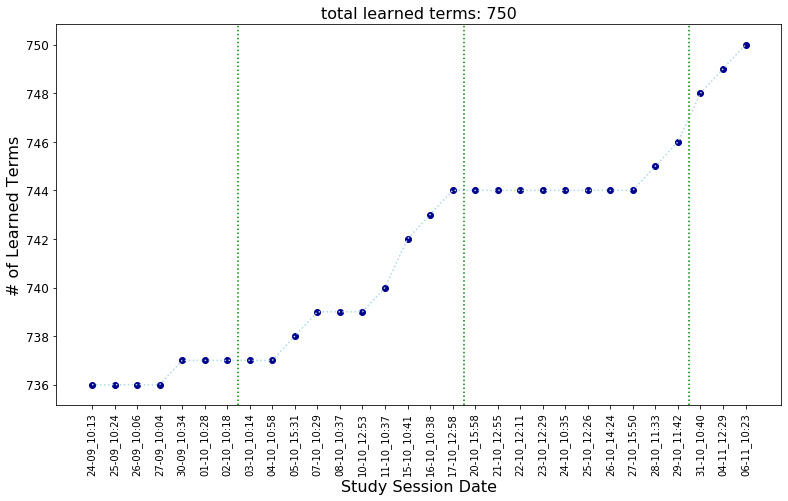

In [7]:
# make the plot
x = np.arange(len(plt_scores))
plt.figure(figsize=(13, 7))
plt.plot(x, plt_scores, linestyle='dotted', color='lightblue')
plt.scatter(x, plt_scores, color='darkblue')
plt.xticks(x, plt_dates, rotation=90, size=10)
plt.yticks(size=12)
plt.ylabel('# of Learned Terms', size=16)
plt.xlabel('Study Session Date', size=16)
plt.title(f'total learned terms: {plt_scores[-1]}', size=16)
for bound in cycle_bounds:
    plt.axvline(bound, color='green', linestyle='dotted')
plt.show()

### Unlearned Terms by Frequency

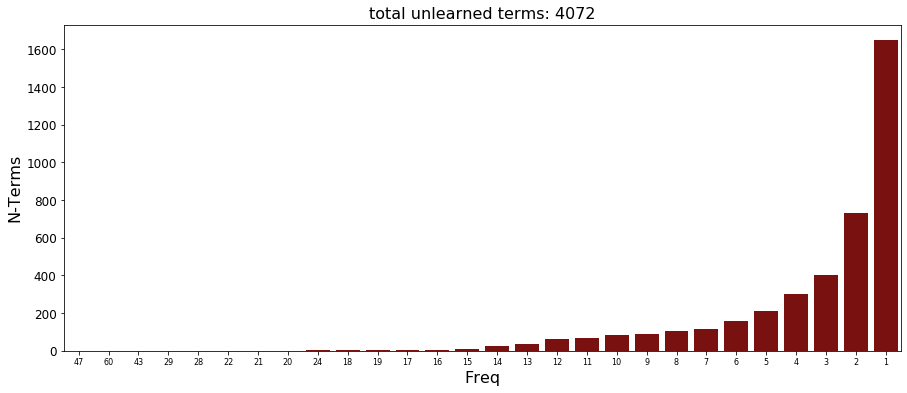

,0
47,1
60,1
43,1
29,1
28,1
22,1
21,1
20,1
24,2
18,2


In [8]:
# get terms left to learn
to_learn = collections.Counter()
for i in grk.set_data['term_queues']['0']:
    term_lexs = grk.set_data['terms_dict'][i]['source_lexemes']
    for term in term_lexs:
        freq = grk.F.freq_lex.v(term)
        to_learn[freq] += 1           
to_learn = pd.DataFrame.from_dict(to_learn, orient='index').sort_values(by=0)

# make the plot
nbars = np.arange(to_learn.shape[0])
plt.figure(figsize=(15, 6))
sns.barplot(nbars, to_learn[0], color='darkred')
plt.xticks(nbars, labels=list(str(i) for i in to_learn.index), size=8)
plt.yticks(size=12)
plt.ylabel('N-Terms', size=16)
plt.xlabel('Freq', size=16)
plt.title(f'total unlearned terms: {to_learn[0].sum()}', size=16)
plt.show()
display(to_learn)

### Push Updates to Github

In [9]:
! cp /Users/cody/Documents/vocabulary/greek.json sample_vocab/.

In [10]:
! git add sample_vocab/greek.json; git commit -m "Latest updates"

[master 7439dd5] Latest updates
 1 file changed, 212 insertions(+), 188 deletions(-)


In [11]:
! git add study_GK.ipynb; git commit -m "Latest session"

[master 1aba8fb] Latest session
 1 file changed, 691 insertions(+), 693 deletions(-)
 rewrite study_GK.ipynb (79%)


In [ ]:
! git push origin master

Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 4 threads
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 48.93 KiB | 4.08 MiB/s, done.
Total 7 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 2 local objects.
